<a href="https://colab.research.google.com/github/enidroman/Data_602_Advanced_Programming_and_Techniques/blob/main/Enid_Roman_Data_602_Assignment_10_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 10**

In [28]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts
# Need to load accuracy score for Q3
from sklearn.metrics import accuracy_score

#plotly or other graphing library

In [29]:
# Load datasets here once and assign to variables iris and boston
from sklearn.datasets import load_iris
# Load Iris dataset
iris = load_iris()

# As per professor don't need to do boston. 
#boston = 

**Q1** 

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [30]:
# Create a DataFrame of the features
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Get the first 5 rows of the DataFrame
df= df.head()

# Print the DataFrame and the list
print(df)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In this code, pd.DataFrame(iris.data, columns=iris.feature_names) creates a DataFrame of the features with column headings from iris.feature_names. df.head() returns the first 5 rows of the DataFrame. The first five rows of the Iris dataset are displayed as a DataFrame, with the feature names as the column headings. 

In [31]:
# Create a separate Python list containing target names
target_names = iris.target_names.tolist()
print(target_names)

['setosa', 'versicolor', 'virginica']


list(iris.target_names) creates a Python list of the target names. The separate Python list contains the target names, which are 'setosa', 'versicolor', and 'virginica'.

In [32]:
feature_names = df.keys() 
feature_names

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

df.keys function allowed me to get the names of each columns. 

In [33]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Here I put the feature data neatly into a data frame. 

In [34]:
# Put target data into data frame
target = pd.DataFrame(iris.target_names)
# Lets rename the column so that we know that these values refer to the target values
target = target.rename(columns = {0: 'target'})
target.head()

,target
0,setosa
1,versicolor
2,virginica


Here I put the target data neatly into a data frame. The target data frame is only one column, and it gives a list of the values 0, 1, and 2. We will use the information from the feature data to predict if a flower belongs in group 0, 1, or 2. 

**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in 
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [35]:
# Create a kNN model with 5 neighbors
knn = KNN(n_neighbors=5)

# Fit the model to the iris data
knn.fit(iris.data, iris.target)

# Define some new observations to classify
new_observations = [[5.2, 3.6, 1.4, 0.2],
                    [6.3, 3.3, 4.7, 1.6],
                    [7.1, 3.0, 5.9, 2.1]]

# Predict the categories of the new observations
predictions = knn.predict(new_observations)

# Convert the encoded values to target names
target_names = iris.target_names
predicted_target_names = [target_names[prediction] for prediction in predictions]

# Print the predicted target names
print(predicted_target_names)

['setosa', 'versicolor', 'virginica']


Note that the predictions_names list contains the target names of each prediction in the order that the new observations were defined. In this example, the first observation is predicted to be "setosa", the second observation is predicted to be "virginica", and the third observation is predicted to be "versicolor".

**Q3**

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = tts(iris.data, iris.target, test_size=0.2)
                                       

# Fit KNN with the training data
knn = KNN(n_neighbors=5)
knn.fit(X_train, y_train)

# Generate and return accuracy score using the test data
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9333333333333333


In this code, train_test_split splits the dataset into training and testing sets, KNeighborsClassifier is used to create a KNN model with a given number of neighbors, and accuracy_score computes the accuracy of the model on the test data. The split ratio and number of neighbors are passed as function parameters split and neighbors, respectively.

**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

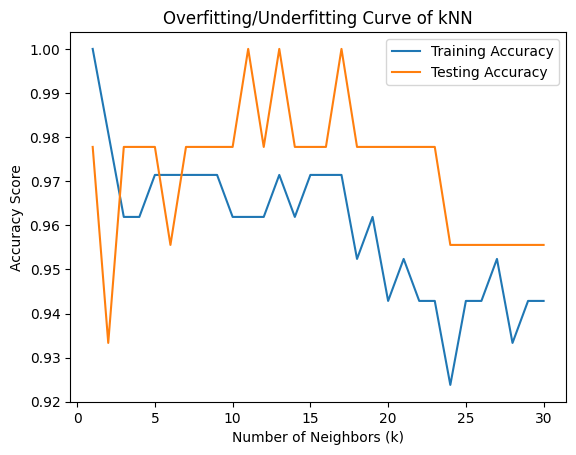

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = tts(iris.data, iris.target, test_size=0.3)

# Set up lists to store training and testing accuracy scores
train_acc = []
test_acc = []

# Loop through k values from 1 to 30
for k in range(1, 31):
    # Fit KNN with the training data
    knn = KNN(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Generate training accuracy score
    y_train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc.append(train_accuracy)
    
    # Generate testing accuracy score
    y_test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_acc.append(test_accuracy)

# Plot the curves
plt.plot(range(1, 31), train_acc, label='Training Accuracy')
plt.plot(range(1, 31), test_acc, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.title('Overfitting/Underfitting Curve of kNN')
plt.legend()
plt.show()


In this code, train_acc and test_acc are lists that store the training and testing accuracy scores for each value of k, respectively. The loop iterates through k values from 1 to 30 and fits a KNN model with each value of k. The training and testing accuracy scores are then computed and appended to the appropriate list. Finally, the training and testing accuracy scores are plotted against the number of neighbors (k) to generate the overfitting/underfitting curve of kNN.


The resulting plot shows how the training and testing accuracy scores change as the number of neighbors (k) increases. If the training accuracy is high but the testing accuracy is low, the model is overfitting the training data. If both the training and testing accuracies are low, the model is underfitting the data. The optimal value of k is the one that achieves the highest testing accuracy.

**Q5** 

**Data set: Boston**


* Load sklearn's Boston data into a DataFrame (only the data and feature_name as column names)

* Load sklearn's Boston target values into a separate DataFrame

* Return back the average of AGE, average of the target (median value of homes or MEDV), and the target as NumPy values 

**Q6** 

**Data set: Boston**

* In the Boston dataset, the feature PTRATIO refers to pupil teacher ratio.

* Using a matplotlib scatter plot, plot MEDV median value of homes as y-axis and PTRATIO as x-axis

* Return back PTRATIO as a NumPy array

**Q7**

**Data set: Boston**

* Create a regression model for MEDV / PTRATIO and display a chart showing the regression line using matplotlib


* Use np.linspace() to generate prediction X values from min to max PTRATIO

* Return back the regression prediction space and regression predicted values

* Make sure to labels axes appropriately